In [1]:
# Importing Libraries
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
# Reading CSV file which contains stock names from different industries from S & P 500 
stocks=pd.read_csv("D:\Dissertation\StockMarketPrediction\constituents_csv.csv")


In [3]:
# Reading the top 5 stocks
stocks.shape


(505, 3)

In [4]:
# Checking the industries in different sectors
stocks['Sector'].value_counts()

Industrials               74
Information Technology    74
Financials                65
Health Care               64
Consumer Discretionary    63
Consumer Staples          32
Real Estate               29
Utilities                 28
Materials                 28
Communication Services    27
Energy                    21
Name: Sector, dtype: int64

In [5]:
# There are two industries which are occupied with more companies
# We are concentrating more on Information Technology

companies_it=stocks[stocks['Sector'].isin(["Information Technology"])]

In [6]:
# Extracted company names in IT sector.
companies_it.head()

,Symbol,Name,Sector
5,ACN,Accenture,Information Technology
8,ADBE,Adobe,Information Technology
10,AMD,Advanced Micro Devices,Information Technology
15,AKAM,Akamai Technologies,Information Technology
39,APH,Amphenol,Information Technology


In [7]:
# Checking the companies 
uniq_stocks=list(companies_it['Symbol'].unique())


In [8]:
# Extracting the data from public website using DataReader libraries from pandas. This will be the main file.
main_df=pd.DataFrame()
invalid_stoc=[]
for sto in uniq_stocks:
    try:
        sto_time=web.DataReader(sto,'yahoo')
        sto_time['Stock_Name']=sto
        main_df=pd.concat([main_df,sto_time])
    except Exception as e :
        #print(e)
        invalid_stoc.append(e)


# Checking the sample data from the main data frame
main_df.sample(5)

,High,Low,Open,Close,Volume,Adj Close,Stock_Name
Date,,,,,,,
2022-07-05,213.809998,207.320007,210.000000,213.679993,750800.0,213.679993,FLT
2021-12-06,509.799988,495.000000,501.489990,507.730011,109500.0,507.730011,TYL
2020-07-10,322.989990,315.440002,321.910004,319.440002,1328000.0,297.793732,AVGO
2018-09-25,29.969999,29.600000,29.670000,29.790001,3675000.0,26.398102,JNPR
2019-01-16,38.075001,37.154999,37.742500,37.209999,47010400.0,36.946808,NVDA


In [9]:
companies_it.head()

,Symbol,Name,Sector
5,ACN,Accenture,Information Technology
8,ADBE,Adobe,Information Technology
10,AMD,Advanced Micro Devices,Information Technology
15,AKAM,Akamai Technologies,Information Technology
39,APH,Amphenol,Information Technology


In [10]:
# Saving the file
main_dataset=main_df.to_csv('D:\Dissertation\StockMarketPrediction\main_Dataset.csv')

In [11]:
# Extract the data for  IT company  Accenture and Adobe
main_ACN=main_df[main_df['Stock_Name']=='ACN']
main_ADB=main_df[main_df['Stock_Name']=='ADBE']

In [12]:
main_ACN.tail()

,High,Low,Open,Close,Volume,Adj Close,Stock_Name
Date,,,,,,,
2022-11-14,292.829987,284.980011,286.149994,288.910004,2493000.0,288.910004,ACN
2022-11-15,296.450012,290.029999,293.000000,292.649994,1960700.0,292.649994,ACN
2022-11-16,293.079987,290.109985,292.750000,291.510010,1607900.0,291.510010,ACN
2022-11-17,289.690002,283.350006,285.809998,287.140015,1555400.0,287.140015,ACN
2022-11-18,290.899994,283.040009,290.609985,286.500000,1322900.0,286.500000,ACN


In [13]:
main_ACN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,232.112035,227.701137,229.867933,229.932766,2.151945e+06,223.245786
std,68.582554,67.146017,67.879585,67.810292,8.966301e+05,69.886656
min,136.919998,132.630005,134.800003,133.669998,5.281000e+05,126.605682
25%,168.382496,165.149998,166.757500,166.480000,1.601100e+06,157.643841
50%,211.305000,208.824997,210.000000,210.405006,1.954750e+06,202.115768
75%,287.245003,282.294991,285.000000,285.074997,2.412575e+06,280.463722
max,417.369995,413.679993,416.260010,415.420013,8.561500e+06,409.828918


In [14]:
main_ACN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-11-21 to 2022-11-18
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        1258 non-null   float64
 1   Low         1258 non-null   float64
 2   Open        1258 non-null   float64
 3   Close       1258 non-null   float64
 4   Volume      1258 non-null   float64
 5   Adj Close   1258 non-null   float64
 6   Stock_Name  1258 non-null   object 
dtypes: float64(6), object(1)
memory usage: 78.6+ KB


In [15]:
# plt.matshow(main_ACN.corr())
# plt.show()
corr = main_ACN.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\PraVeeN\AppData\Local\Temp\ipykernel_18912\3712340859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = main_ACN.corr()
C:\Users\PraVeeN\AppData\Local\Temp\ipykernel_18912\3712340859.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,High,Low,Open,Close,Volume,Adj Close
High,1.000,0.999,0.999,0.999,-0.025,0.999
Low,0.999,1.000,0.999,0.999,-0.049,0.999
Open,0.999,0.999,1.000,0.999,-0.036,0.999
Close,0.999,0.999,0.999,1.000,-0.038,1.000
Volume,-0.025,-0.049,-0.036,-0.038,1.000,-0.035
Adj Close,0.999,0.999,0.999,1.000,-0.035,1.000


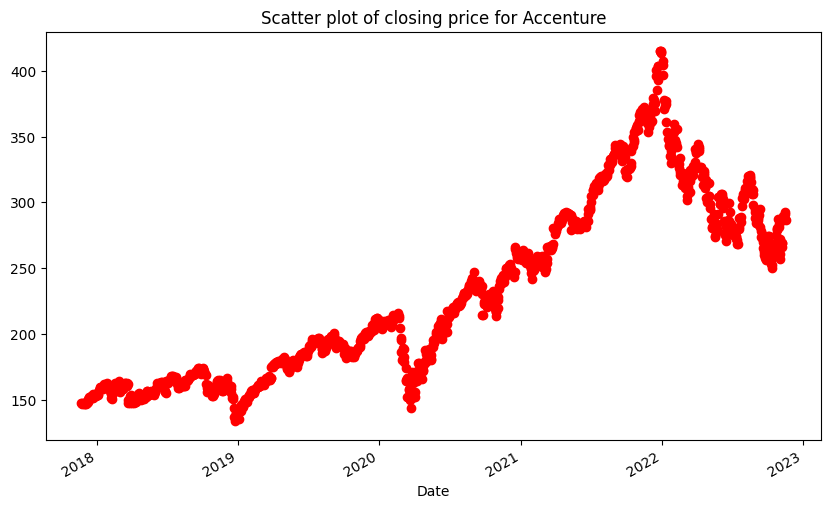

In [16]:
# Scatter plot for the closing price for one company - Accenture
plt.figure(figsize=(10,6))
df_close = main_ACN['Close']
df_close.plot(style='or')
plt.title('Scatter plot of closing price for Accenture')
plt.show()

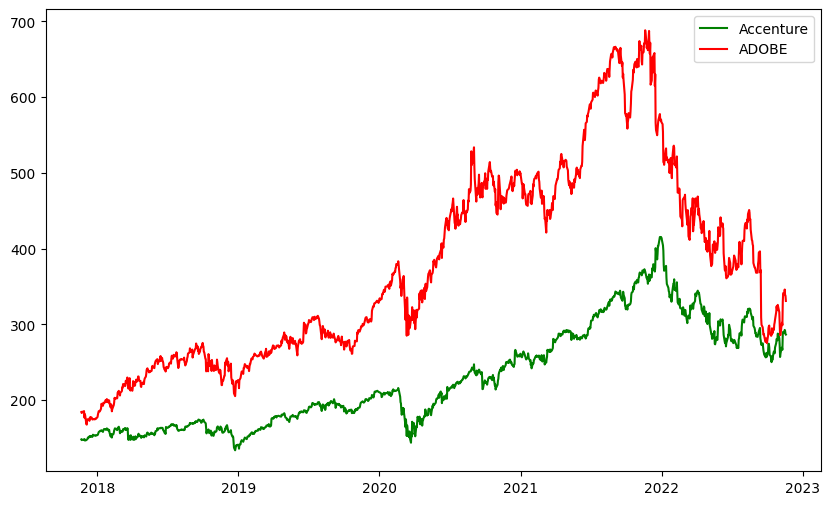

In [17]:
# Line plot for two companies Accenture and Adobe
plt.figure(figsize=(10,6))
plt.plot(main_ACN['Close'], 'g', label='Accenture')
plt.plot(main_ADB['Close'], 'r', label='ADOBE')
plt.legend()
plt.show()

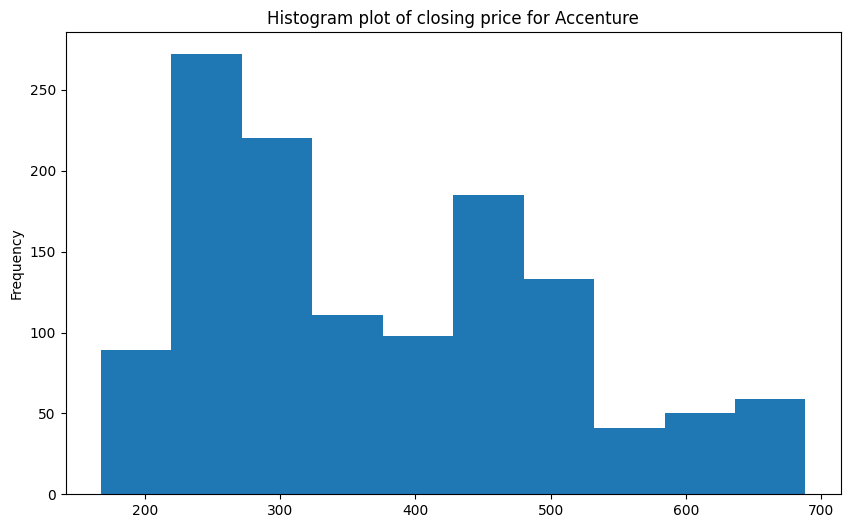

In [18]:
# Histogram plot to understand the variation  for Accenture

plt.figure(figsize=(10,6))
df_close = main_ADB['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Histogram plot of closing price for Accenture')
plt.show()

In [19]:
# Checking the seasonality and identifying the trend for Adobe stock 
sd_adb=seasonal_decompose(main_ADB['Close'],period=365)

<AxesSubplot: xlabel='Date'>

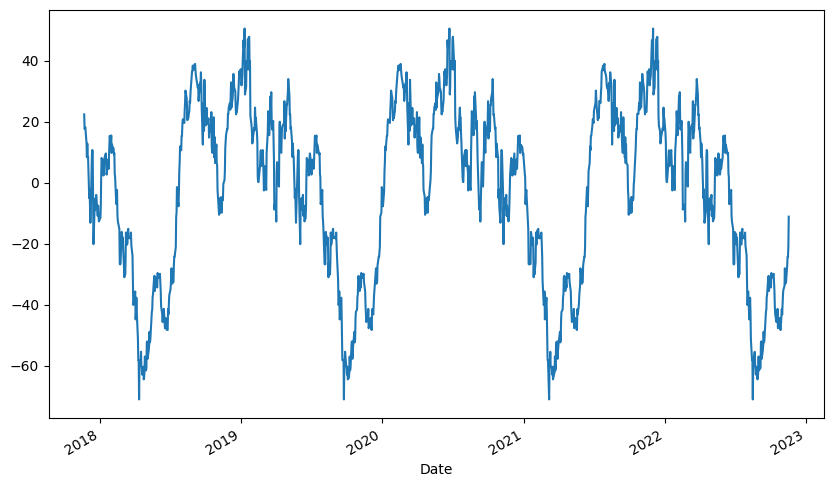

In [20]:
# From the below figure we can understand their is some seasonality for the ADOBE stock
plt.figure(figsize=(10,6))
sd_adb.seasonal.plot()

<AxesSubplot: xlabel='Date'>

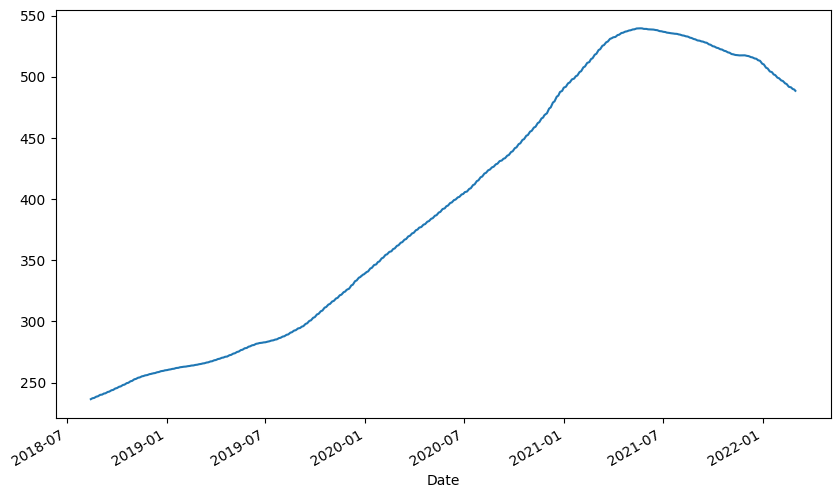

In [21]:
# There is an increasing trend for this stock
plt.figure(figsize=(10,6))
sd_adb.trend.plot()

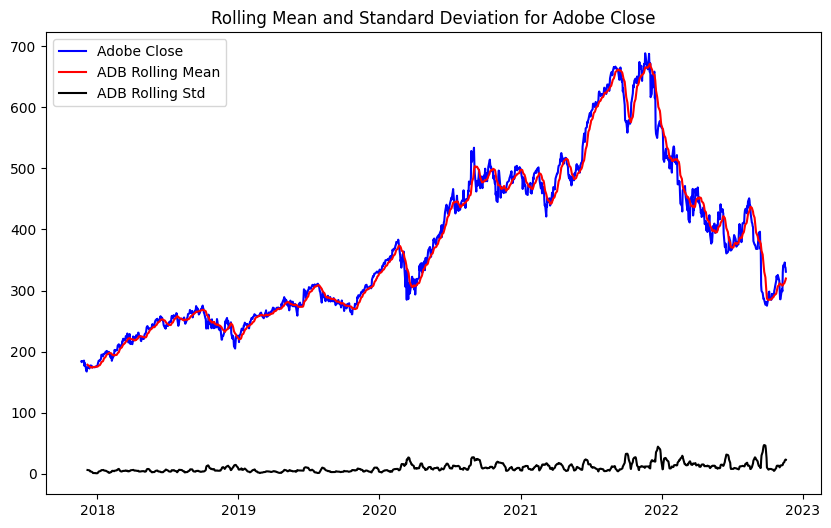

In [22]:
# Checking whether the Adobe stock data is stationery or not using Dickey Fuller test and Rolling Mean and Rolling Standard Deviation

ADB_close=main_ADB['Close']
rolmean_adb = ADB_close.rolling(12).mean()
rolstd_adb = ADB_close.rolling(12).std()

# Graph for Rolling Mean and St Deviation  :
plt.figure(figsize=(10,6))
plt.plot(ADB_close, color='blue',label='Adobe Close')
plt.plot(rolmean_adb, color='red', label='ADB Rolling Mean')
plt.plot(rolstd_adb, color='black', label = 'ADB Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation for Adobe Close')
plt.show(block=False)

# Standard Deviation is constant but mean is not constant , so it is not stationary

In [23]:
#When analyzing time series data, you should undertake a number of steps. 
# First, you need to check for stationarity and autocorrelation

In [24]:
#Stationarity is a way to measure if the data has structural patterns like seasonal trends. 
# Autocorrelation occurs when future values in a time series linearly depend on past values. 
# You need to check for both of these in time series data because they’re assumptions that
#  are made by many widely used methods in time series analysis. For example, the autoregressive integrated moving average (ARIMA) method for forecasting time series assumes stationarity.

In [25]:
#Decomposition allows you to visualize trends in your data, which is a great way to clearly 
# explain their behavior. Finally, forecasting allows you to anticipate future events that
#  can aid in decision making. 

In [26]:
#Stationarity means that the manner in which time series data changes is constant. 
# A stationary time series will not have any trends or seasonal patterns.

In [27]:
#If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

In [28]:
# Null hypothesies - Data is not stationery. So if we reject we claim that data is stationery
# P value is greater that 0.05 , we can accept Nullhypothesies
# P value is less than 0.05 , we can reject null hypothesies


In [29]:
#Dickey Fuller test to check for stationarity
print("Results of dickey fuller test for Adobe Stock Closing Price ")
adft = adfuller(ADB_close,autolag='AIC')
adft
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print(output_df)

Results of dickey fuller test for Adobe Stock Closing Price 
        Values                       Metric
0    -1.673817              Test Statistics
1     0.444651                      p-value
2     9.000000             No. of lags used
3  1248.000000  Number of observations used
4    -3.435601          critical value (1%)
5    -2.863859          critical value (5%)
6    -2.568004         critical value (10%)


In [30]:
# In the above graph P value is greater than 0.05 , so we can accept null hypothesies , that data is not stationary


In [31]:
# Rolling Mean and Standard Deviation to check the stationarity of the data
ADB_month_mean=ADB_close.rolling(30).mean()
ADB_month_std=ADB_close.rolling(30).std()

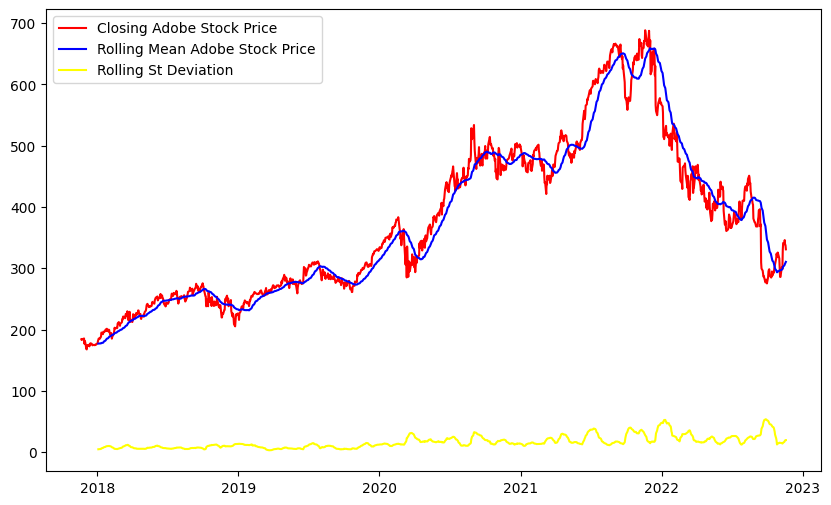

In [32]:
# Plots to check the stationarity of data
plt.figure(figsize=(10,6))
plt.plot(ADB_close,color="red",label="Closing Adobe Stock Price")
plt.plot(ADB_month_mean ,color="blue",label="Rolling Mean Adobe Stock Price")
plt.plot(ADB_month_std,color="yellow",label="Rolling St Deviation")
plt.legend(loc="best")

In [33]:
# Checking whether data is Auto Correlated or not
# Autocorrelation in Python is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values.

# Auto correlation for Adobe stock price across 3, 4, 6 months

adb_lag7=ADB_close.autocorr(lag=7)
adb_lag21=ADB_close.autocorr(lag=21)
print(adb_lag7)
print(adb_lag21)

# Data is auto correlated across different time periods

0.9860383652590861
0.9553696764417401


<Figure size 2000x1000 with 0 Axes>

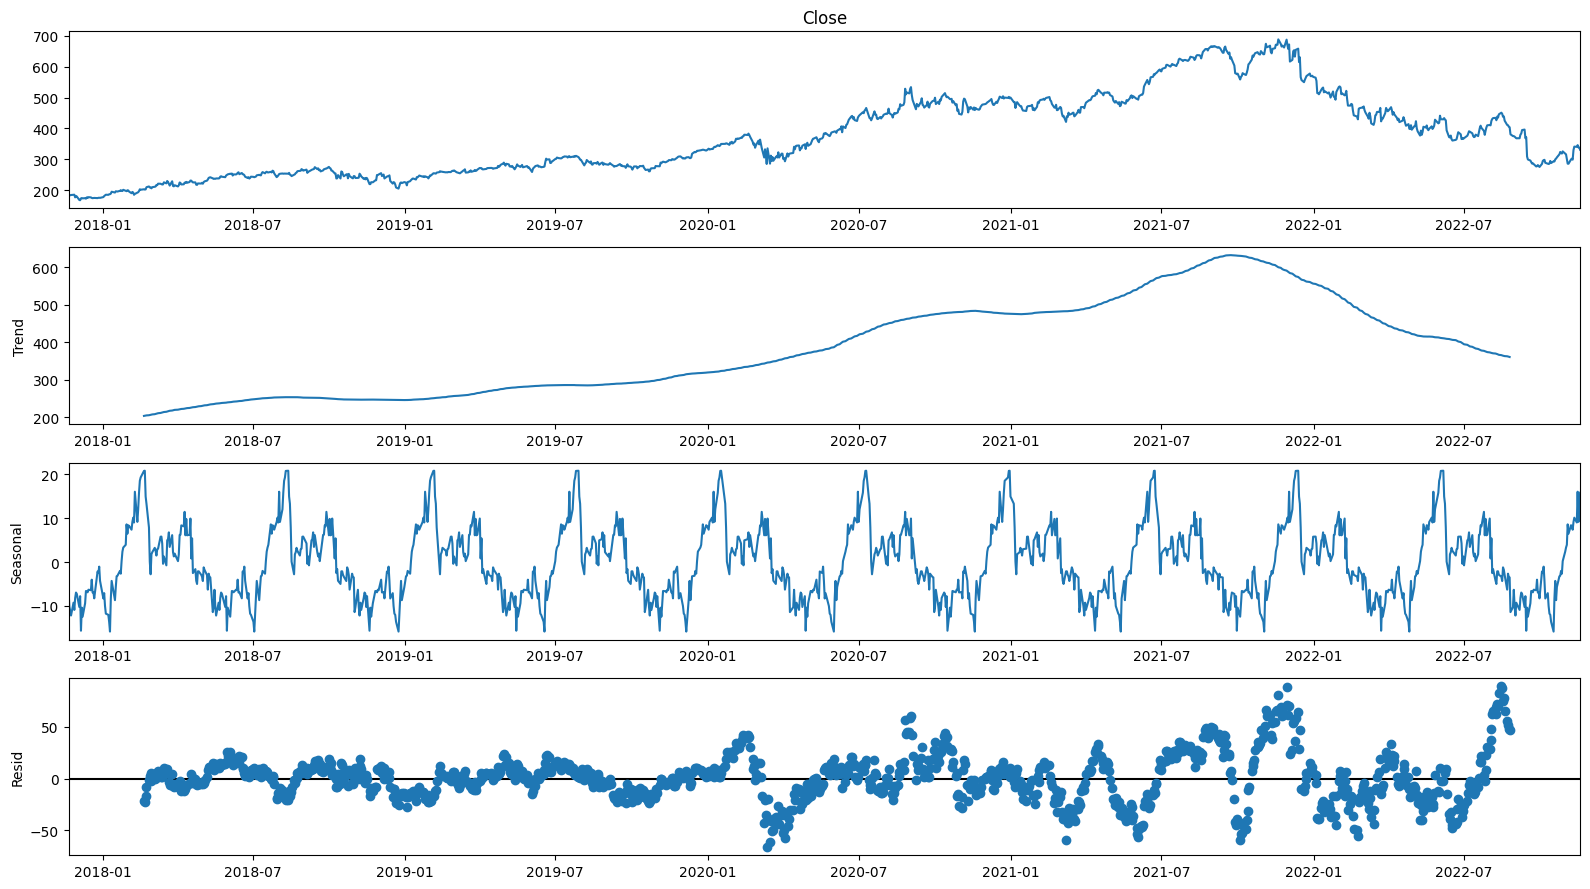

In [34]:
decompose_7=seasonal_decompose(main_ADB['Close'],period=120)

plt.figure(figsize=(20,10))
fig=decompose_7.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [35]:
main_ADB['Date']=main_ADB.index
train=main_ADB[main_ADB['Date']<pd.to_datetime('2022-10-01',format='%Y-%M-%d')]
test=main_ADB[main_ADB['Date']>=pd.to_datetime('2022-10-01',format='%Y-%M-%d')]

C:\Users\PraVeeN\AppData\Local\Temp\ipykernel_18912\3872264236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ADB['Date']=main_ADB.index


In [36]:
train_data=train[['Adj Close']]
test_data=test[['Adj Close']]

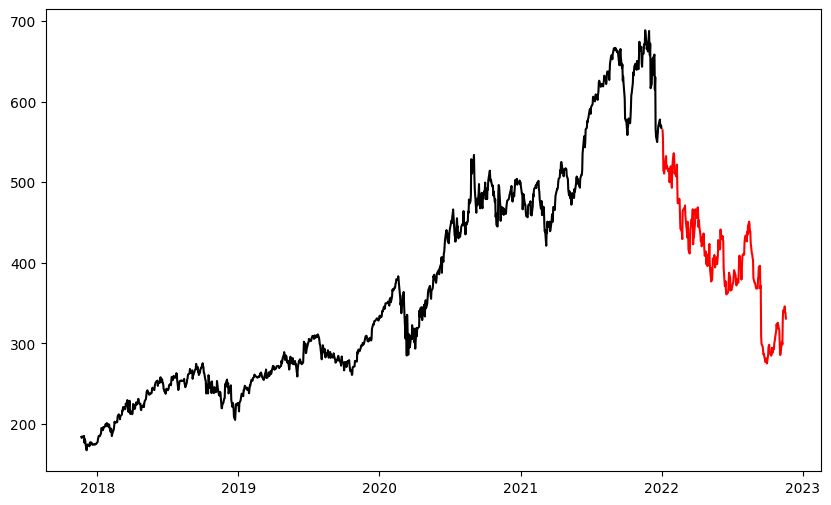

In [37]:
plt.figure(figsize=(10,6))
plt.plot(train_data['Adj Close'],color='black')
plt.plot(test_data['Adj Close'],color='red')

In [38]:
# An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.
# This relationship between variables is called correlation.
#We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. 
# The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that 
# variable when modeling.
#because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation.
#We can plot the observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

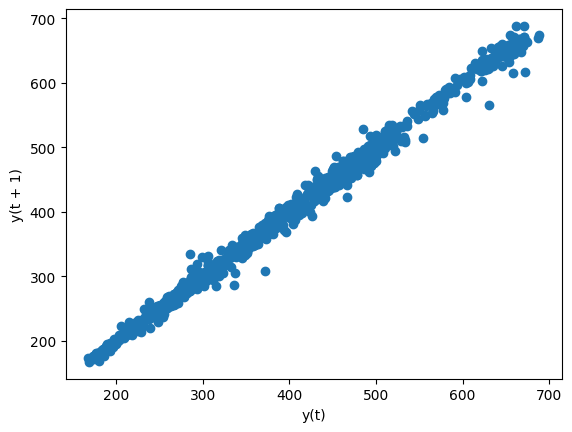

In [39]:
from pandas.plotting import lag_plot
lag_plot(ADB_close)
# It clearly shows correlation

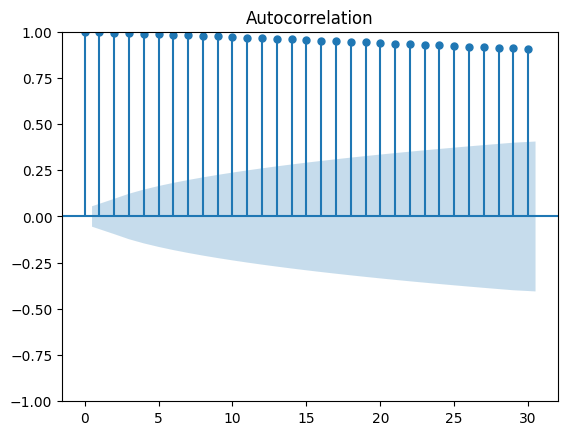

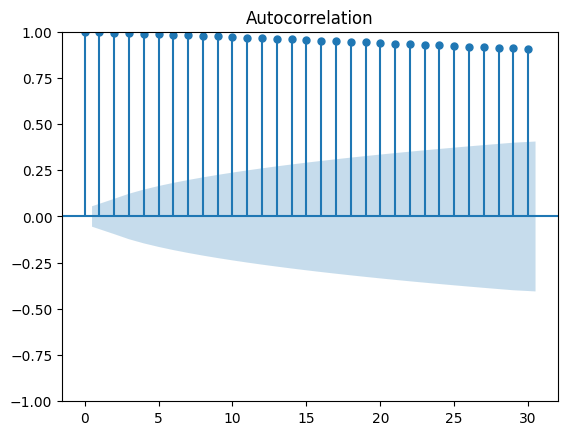

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf,acf,pacf
#plot_pacf(ADB_close, lags = 30, method = "ols")
plot_acf(ADB_close, lags = 30)

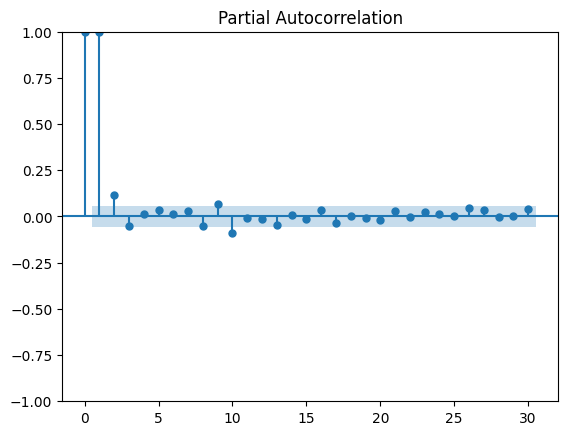

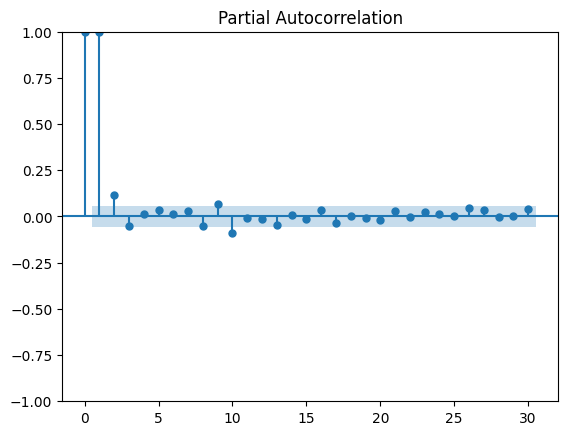

In [41]:
plot_pacf(ADB_close, lags = 30, method = "ols")

In [42]:
# Auto Regression Model
#An autoregression model is a linear regression model that uses lagged variables as input variables.
#We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use.

#Alternately, the statsmodels library provides an autoregression model where you must specify an appropriate lag value and 
# trains a linear regression model. It is provided in the AutoReg class.




In [43]:
test_data1=test_data['Adj Close']

In [44]:
len(test_data1)

223

In [45]:
train_data['Adj Close'].values

array([184.1499939 , 182.8999939 , 184.46000671, ..., 569.28997803,
       570.5300293 , 567.05999756])

Test MSE: 31.616


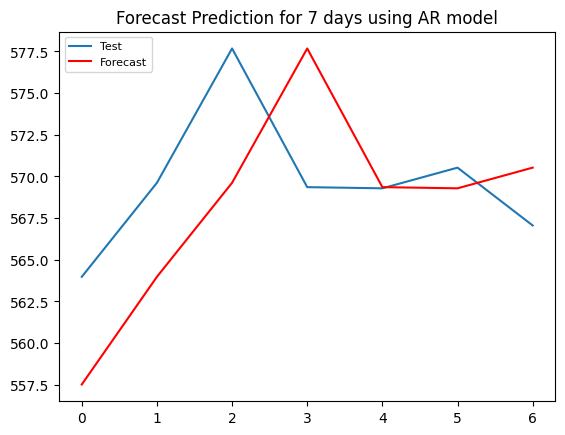

In [46]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

values = DataFrame(train_data['Adj Close'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.title('Forecast Prediction for 7 days using AR model')
pyplot.plot(test_y,label='Test')
pyplot.plot(predictions, color='red',label='Forecast')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARMA
# values = DataFrame(train_data['Adj Close'].values)
# dataframe = concat([values.shift(1), values], axis=1)
# dataframe.columns = ['t-1', 't+1']
# # split into train and test sets
# X = dataframe.values
# train, test = X[1:len(X)-7], X[len(X)-7:]
# train_X, train_y = train[:,0], train[:,1]
# test_X, test_y = test[:,0], test[:,1]
model = ARMA(train_data['Adj Close'].values, order=(0, 1))
model_fitted = model.fit()

In [ ]:
train_X

array([181.91999817, 181.72000122, 181.8500061 , ..., 566.09002686,
       556.64001465, 549.77001953])

In [ ]:
# Moving Average Model
#One of the foundational models for time series forecasting is the moving average model, denoted as MA(q).
#  This is one of the basic statistical models that is a building block of more complex models such as the ARMA, ARIMA, SARIMA and SARIMAX models.
#A moving average process, or the moving average model, states that the current value is linearly dependent on the current and past error terms. Again,
#  the error terms are assumed to be mutually independent and normally distributed, just like white noise.
#The order q of the moving average model determines the number of past error terms that affect the present value. For example, 
# if it is of order one, meaning that we have a MA(1) process,

# Plot ACF to determine lags
#We notice that there are significant coefficients after lag 0. In fact, they are significant up until lag 2. 
# Then, they abruptly become non-significant as they remain in the shaded area of the plot. 


In [ ]:
#Since we have significant autocorrelation coefficients up until lag 2, this means that we have a stationary moving average process of order 2. 
# Therefore, we can use a second-order moving average model, or MA(2) model, to forecast our stationary time series.

#Thus, we can see how the ACF plot helps us determine the order of a moving average process. 
# The ACF plot will show significant autocorrelation coefficients up until lag q, after which all coefficients will be non-significant.

# https://towardsdatascience.com/defining-the-moving-average-model-for-time-series-forecasting-in-python-626781db2502


In [ ]:
test_data['Adj Close']

Date
2022-01-03    564.369995
2022-01-04    554.000000
2022-01-05    514.429993
2022-01-06    514.119995
2022-01-07    510.700012
                 ...    
2022-10-31    318.500000
2022-11-01    316.019989
2022-11-02    301.220001
2022-11-03    285.929993
2022-11-04    285.750000
Name: Adj Close, Length: 213, dtype: float64

In [ ]:
#The autocorrelation analysis helps detect patterns and check for randomness. 
#It’s especially important when you intend to use an autoregressive–moving-average (ARMA) model for forecasting because 
#it helps to determine its parameters. 
#The analysis involves looking at the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

In [ ]:
#The ACF and PACF plots are used to figure out the order of AR, MA, and ARMA models.
# ACF and PACF plots are used to figure out the order of AR, MA, and ARMA models.
#The Auto-Regressive (AR) model assumes that the current value (y_t) is dependent on previous values.
#To figure out the order of an AR model, you need to look at the PACF


In [ ]:
#The Moving Average (MA) model assumes that the current value (y_t) is dependent on the error terms
#including the current error (𝜖_t, 𝜖_(t-1),…).
#Because error terms are random, there’s no linear relationship between the current value and the error terms.
#To figure out the order of an MA model, you need to look at the ACF.
#ACF and PACF assume stationarity of the underlying time series.

In [ ]:
#Autocorrelation is the correlation between a time series with a lagged version of itself. The ACF starts at a lag of 0,
#which is the correlation of the time series with itself and therefore results in a correlation of 1.

In [ ]:
acf(ADB_close)


array([1.        , 0.99662455, 0.99381733, 0.99079874, 0.98796744,
       0.98526573, 0.98261688, 0.98004923, 0.97718382, 0.9747083 ,
       0.97169035, 0.96874404, 0.96567371, 0.96242409, 0.95928242,
       0.95607145, 0.95310617, 0.9498296 , 0.94671678, 0.94344784,
       0.9400141 , 0.93674844, 0.93347163, 0.9303876 , 0.92725593,
       0.92415889, 0.92115038, 0.91831866, 0.91546563, 0.91259735,
       0.90994286, 0.90740441])

In [ ]:
pacf(ADB_close)

array([ 1.        ,  0.99741678,  0.10821373, -0.03110195,  0.02726907,
        0.03196832,  0.01281536,  0.01609468, -0.05578508,  0.06418639,
       -0.0892912 , -0.0147949 , -0.01892772, -0.04616414,  0.00763348,
       -0.01072644,  0.03145966, -0.04363652,  0.00431121, -0.01352578,
       -0.04110106,  0.02326364,  0.01220478,  0.0259553 ,  0.0071741 ,
       -0.01065525,  0.03259041,  0.0382182 , -0.00288404,  0.00892535,
        0.03713998,  0.04180912])

In [ ]:
#An ARIMA model is characterized by 3 terms: p, d, q
#term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. 
#Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.
#d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

In [ ]:
#p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 
#And ‘q’ is the order of the ‘Moving Average’ (MA) term. 
#It refers to the number of lagged forecast errors that should go into the ARIMA Model.
#Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.
# A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags.

In [ ]:
# From Dickey Fuller test , we found data is not stationary
# So  differencing the data to acheive stationarity

# We need to identify  p, d , q values to build ARIMA model


In [ ]:
#Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. 
##We use statistical techniques to generate these 
#values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF 
#graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be 
#suitable for the data set to provide better forecasting.

In [ ]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

#Stationarity is an important concept in time-series and any time-series data should undergo 
# a stationarity test before proceeding with a model.
#We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is
#  stationary or not which is available in the ‘pmdarima’ package.

adftest=ADFTest(alpha=0.05)
adftest.should_diff(ADB_close)
# From below we can conclude data is stationary

(0.9802887286687972, True)

In [ ]:
train_data['Adj Close'].shape

(1043,)

In [ ]:
ADB_close.shape

(1259,)

In [ ]:
#Auto ARIMA model, note that small p,d,q values represent non-seasonal components, 
#and capital P, D, Q represent seasonal components.

arima_auto_train=auto_arima(train_data['Adj Close'],start_p=0,d=0,start_q=0,max_d=3,max_p=3,max_q=3,
                      start_P=0,start_Q=0,D=0,max_P=3,max_Q=3,max_D=3,m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=13271.261, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=15418.941, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=11918.861, Time=0.47 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=7362.918, Time=0.35 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=7362.333, Time=0.96 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=7359.854, Time=3.01 sec
 ARIMA(1,0,1)(3,0,0)[12] intercept   : AIC=7361.830, Tim

In [ ]:
arima_auto_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1046
Model:             SARIMAX(1, 0, 2)x(2, 0, [], 12)   Log Likelihood               -3680.643
Date:                             Sat, 05 Nov 2022   AIC                           7375.287
Time:                                     15:10:40   BIC                           7409.956
Sample:                                          0   HQIC                          7388.435
                                            - 1046                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3304      0.557      0.593      0.553      -0.762       1.423
ar.L1          0.9991      0.001    697.223      0.000       0.996       1.002
ma.L1         -0.1814      0.018     -9.964      0.000      -0.217      -0.146
ma.L2          0.0722      0.017      4.152      0.000       0.038       0.106
ar.S.L12       0.0522      0.026      2.045      0.041       0.002       0.102
ar.S.L24      -0.0645      0.031     -2.103      0.036      -0.125      -0.004
sigma2        66.2673      1.470     45.081      0.000      63.386      69.148
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2968.22
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               5.20   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

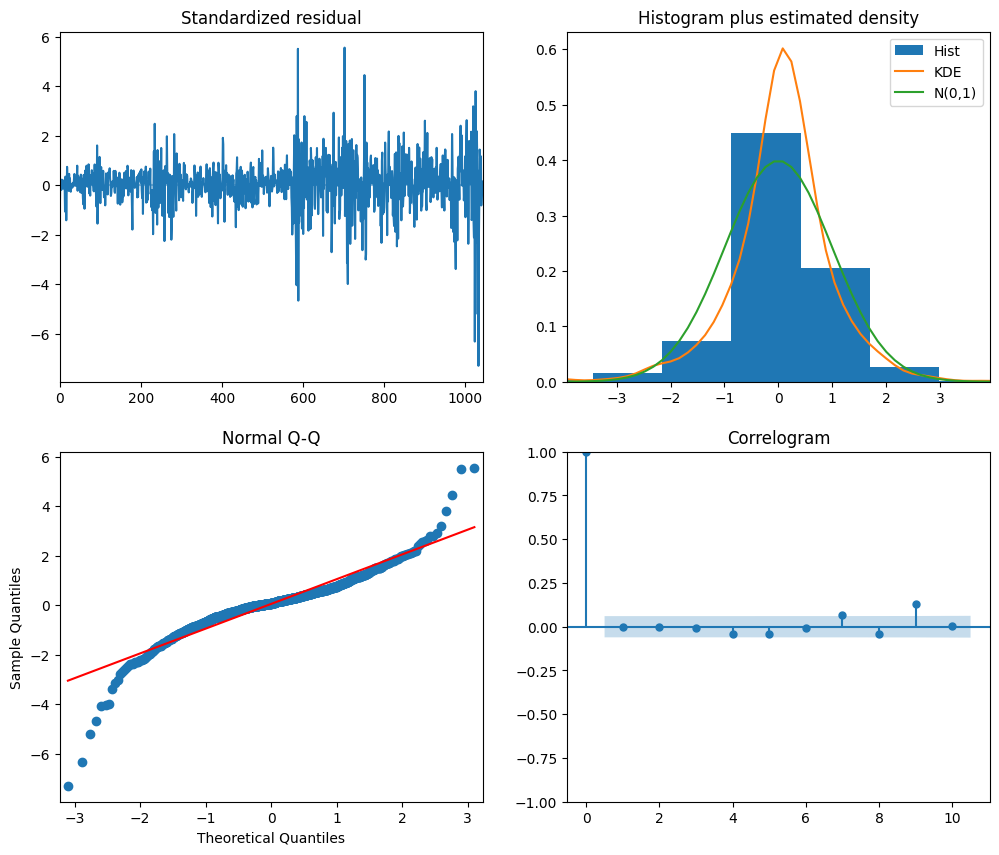

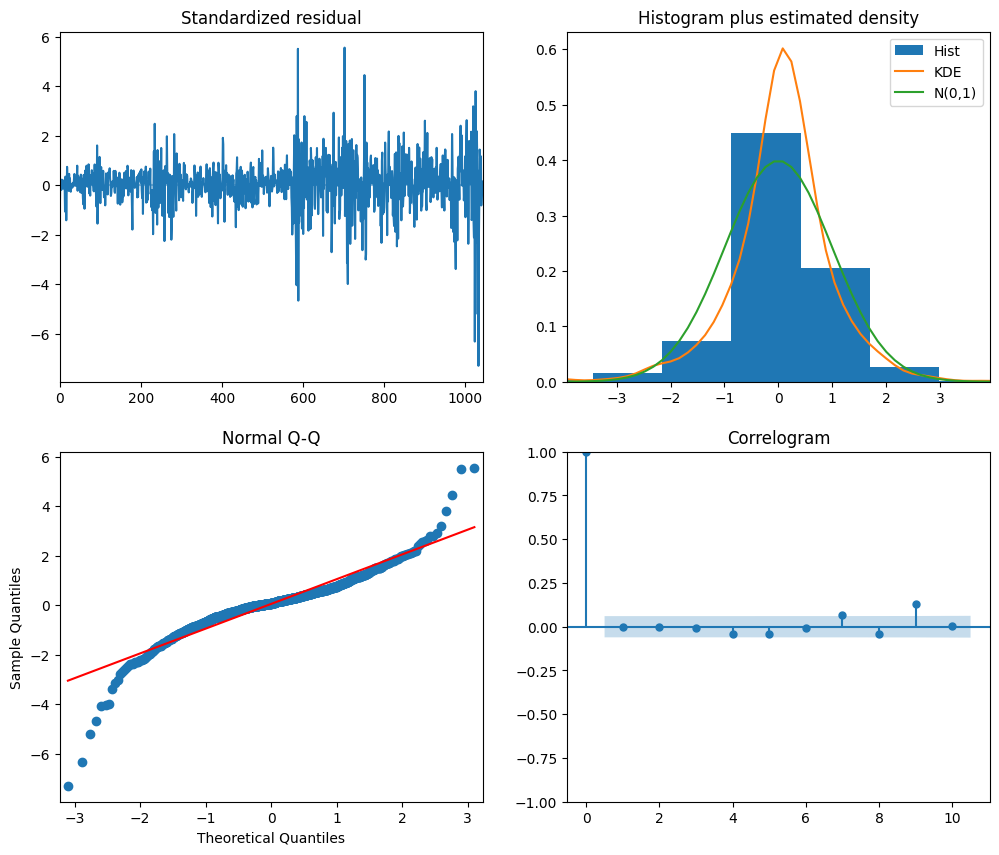

In [ ]:

arima_auto_train.plot_diagnostics(figsize=(12,10))

In [ ]:
prediction=pd.DataFrame({'pred_adjclose':arima_auto_train.predict(n_periods=215)})

C:\Users\PraVeeN\.conda\envs\stock_market_prediction\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
test_data.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-07', '2022-11-08'],
              dtype='datetime64[ns]', name='Date', length=215, freq=None)

In [ ]:
prediction.index=test_data.index

In [ ]:
test_data['Adj Close']

Date
2022-01-03    564.369995
2022-01-04    554.000000
2022-01-05    514.429993
2022-01-06    514.119995
2022-01-07    510.700012
                 ...    
2022-11-02    301.220001
2022-11-03    285.929993
2022-11-04    285.750000
2022-11-07    299.540009
2022-11-08    302.170013
Name: Adj Close, Length: 215, dtype: float64

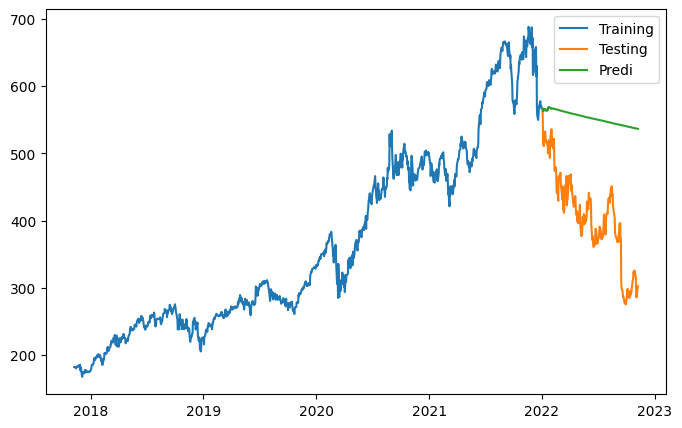

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(train_data['Adj Close'],label='Training')
plt.plot(test_data['Adj Close'],label='Testing')
plt.plot(prediction['pred_adjclose'],label='Predi')
plt.legend()
plt.show()

#https://betterprogramming.pub/using-auto-arima-with-python-e482e322f430



In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data['Adj Close'], order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PraVeeN\.conda\envs\stock_market_prediction\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PraVeeN\.conda\envs\stock_market_prediction\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PraVeeN\.conda\envs\stock_market_prediction\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1046
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -3683.751
Date:                Sat, 05 Nov 2022   AIC                           7377.503
Time:                        19:17:59   BIC                           7402.266
Sample:                             0   HQIC                          7386.894
                               - 1046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        365.8397    103.102      3.548      0.000     163.763     567.916
ar.L1          0.9988      0.001    726.497      0.000       0.996       1.001
ma.L1         -0.1839      0.018    -10.287      0.0

In [ ]:
arima_predict=model_fit.predict()

In [ ]:
arima_predict.shape

(1046,)

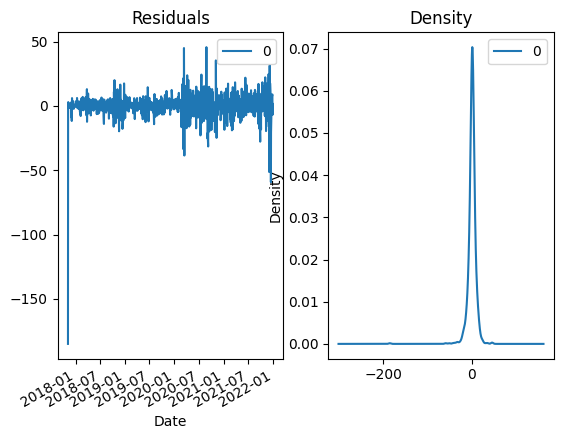

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

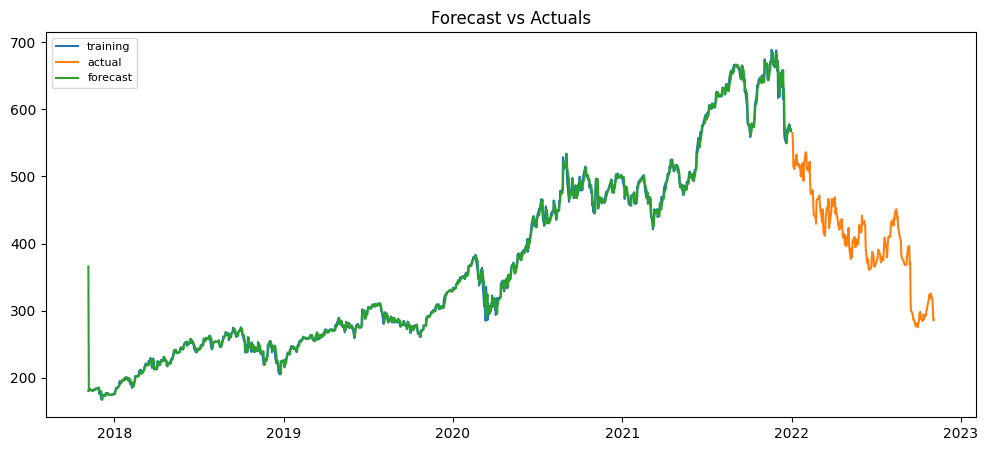

In [ ]:
# model = ARIMA(train['Adj Close'], order=(1, 0, 1))  
# fitted = model.fit(disp=-1)  

# # Forecast
# fc, se, conf = fitted.forecast(208, alpha=0.05)  # 95% conf

# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Adj Close'], label='training')
plt.plot(test['Adj Close'], label='actual')
plt.plot(arima_predict, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#https://builtin.com/data-science/time-series-python
#https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c

In [ ]:
train.head()
x_train=train[['High', 'Low', 'Open', 'Volume']]
y_train=train[['Adj Close']]
x_test=test[['High', 'Low', 'Open', 'Volume']]
y_test=test[['Adj Close']]

In [ ]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
lm_model = LinearRegression()
# Train the model
lm_model.fit(x_train, y_train)




LinearRegression()

In [ ]:
y_pred = lm_model.predict(x_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", lm_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[ 8.43528700e-01  7.31195805e-01 -5.75146927e-01 -3.85783057e-08]]
Mean Absolute Error: 3.303583006973564
Mean squared error: 17.931494454732057
Root mean squared error: 4.2345595349141165
Coefficient of Determination: 0.9960708869800848


In [ ]:
quick_test = pd.DataFrame({'Actual': y_test['Adj Close'], 'Predicted' : y_pred.tolist()})
quick_test.head()

,Actual,Predicted
Date,,
2022-01-03,564.369995,[563.77672000018]
2022-01-04,554.000000,[547.5303118681554]
2022-01-05,514.429993,[522.5133046378043]
2022-01-06,514.119995,[522.2918507773297]
2022-01-07,510.700012,[512.1592906029307]


In [ ]:
#Moving Average
#The moving average (MA) is used to identify the direction of a current price trend, without the 
# interference of shorter-term price spikes. The MA indicator combines price points of a stock over a specified time frame and
#  divides it by the number of data points to present a single trend line. Let’s calculate 20 days (short term) and
# 200 days (long term) MA on TSLA Closing prices (we can calculate MA directly with pandas)

#Why are the moving averages important?
#Moving averages are used to identify significant support and resistance levels. 
# Traders watch for crossovers of longer-term moving averages by shorter-term moving averages as 
# possible indicators of trend changes to enter long and short positions. According to Stan Weinstein: 
# The price must be above the short term MA in order to buy a stock.

In [ ]:
main_ADB.loc[:,'MovingAv20']=main_ADB['Adj Close'].rolling(20).mean()
#main_ADB.loc[:,'MovingAv200']=main_ADB['Adj Close'].rolling(200).mean()



C:\Users\PraVeeN\AppData\Local\Temp\ipykernel_18756\1335038229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ADB.loc[:,'MovingAv20']=main_ADB['Adj Close'].rolling(20).mean()


In [ ]:
#RSI — Relative Strength Index
#The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent 
# price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
#The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.
#  It is most typically used on a 14-day timeframe.

#An asset with RSI ≥70 is often considered overbought, while an asset with RSI ≤ 30 is often considered oversold:

#an overbought signal suggests that assets may be in for a price correction.
#an oversold signal could mean that short-term declines are reaching maturity and assets may be in for a rally.
# df_fb_daily_ticker.loc[:, "rsi"] = talib.RSI(df_fb_daily_ticker.Close, 14)
# df_fb_daily_ticker.tail()

In [ ]:
# Calculare exponential moving average
main_ADB.loc[:,'ExponenMovAver']=main_ADB['Adj Close'].ewm(com=0.4).mean()

C:\Users\PraVeeN\AppData\Local\Temp\ipykernel_18756\1056064541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ADB.loc[:,'ExponenMovAver']=main_ADB['Adj Close'].ewm(com=0.4).mean()


In [ ]:
train=main_ADB[main_ADB['Date']<pd.to_datetime('2022-10-01',format='%Y-%M-%d')]
test=main_ADB[main_ADB['Date']>=pd.to_datetime('2022-10-01',format='%Y-%M-%d')]
x_train=train[['High', 'Low', 'Open', 'Volume','MovingAv20', 'ExponenMovAver']]
y_train=train[['Adj Close']]
x_test=test[['High', 'Low', 'Open', 'Volume','MovingAv20', 'ExponenMovAver']]
y_test=test[['Adj Close']]

In [ ]:
x_train = x_train.iloc[20:]
y_train = y_train.iloc[20:]
x_train.head()

,High,Low,Open,Volume,MovingAv20,ExponenMovAver
Date,,,,,,
2017-12-15,179.979996,174.300003,179.360001,9191700.0,177.910000,176.852753
2017-12-18,179.149994,175.309998,178.419998,3435400.0,177.635000,176.772219
2017-12-19,176.759995,174.229996,176.009995,2509500.0,177.266500,175.484921
2017-12-20,176.000000,172.919998,176.000000,2677300.0,176.771500,174.602834
2017-12-21,175.320007,174.000000,174.050003,2164100.0,176.354501,174.572237


In [ ]:
x_test.shape

(220, 6)

In [ ]:
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Create Regression Model
lm_model_modif = LinearRegression()
# Train the model
lm_model_modif.fit(x_train, y_train)
y_pred_modif = lm_model_modif.predict(x_test)

# Printout relevant metrics
print("Model Coefficients:", lm_model_modif.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_modif))
print("Mean squared error:", mean_squared_error(y_test, y_pred_modif))
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred_modif)))
print("Coefficient of Determination:", r2_score(y_test, y_pred_modif))

Model Coefficients: [[ 1.93291209e-01  2.31875027e-01 -4.03637372e-01  4.46737226e-08
  -3.65719989e-02  1.01581855e+00]]
Mean Absolute Error: 1.8452799786638345
Mean squared error: 6.128458745516979
Root mean squared error: 2.47557240764979
Coefficient of Determination: 0.9986826227248949


In [ ]:
main_ADB.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Stock_Name',
       'Date', 'MovingAv20', 'ExponenMovAver'],
      dtype='object')

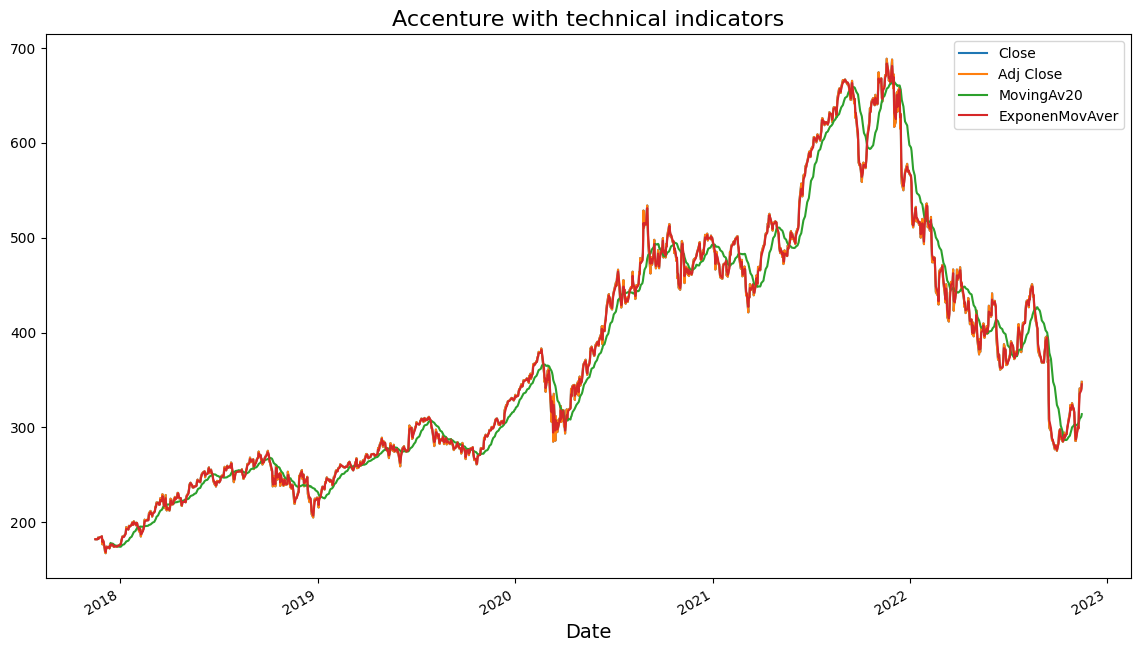

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
l = ax.get_xlabel()
ax.set_xlabel(l,fontsize=14)
ax.set_ylabel(l,fontsize=14)
plt.rcParams["axes.titlesize"] = 16
ax.set_title('Accenture with technical indicators')
main_ADB.plot(x="Date", y=['Close', 'Adj Close','MovingAv20', 'ExponenMovAver'], ax=ax)
plt.show()

In [ ]:
# Predicting on training dataset

train_pred=lm_model_modif.predict(x_train)

In [ ]:
x_train['Train_pred']=train_pred

In [ ]:
x_train.head()

,High,Low,Open,Volume,MovingAv20,ExponenMovAver,Train_pred
Date,,,,,,,
2017-12-15,179.979996,174.300003,179.360001,9191700.0,177.910000,176.852753,176.266349
2017-12-18,179.149994,175.309998,178.419998,3435400.0,177.635000,176.772219,176.390624
2017-12-19,176.759995,174.229996,176.009995,2509500.0,177.266500,175.484921,175.315452
2017-12-20,176.000000,172.919998,176.000000,2677300.0,176.771500,174.602834,173.998390
2017-12-21,175.320007,174.000000,174.050003,2164100.0,176.354501,174.572237,174.865713


In [ ]:
x_train['Adj_Close']=y_train

In [ ]:
x_train.head()

,High,Low,Open,Volume,MovingAv20,ExponenMovAver,Train_pred,Adj_Close,Buy,Gain_per_Stock
Date,,,,,,,,,,
2017-12-15,179.979996,174.300003,179.360001,9191700.0,177.910000,176.852753,176.266349,177.509995,False,-1.850006
2017-12-18,179.149994,175.309998,178.419998,3435400.0,177.635000,176.772219,176.390624,176.740005,False,-1.679993
2017-12-19,176.759995,174.229996,176.009995,2509500.0,177.266500,175.484921,175.315452,174.970001,True,-1.039993
2017-12-20,176.000000,172.919998,176.000000,2677300.0,176.771500,174.602834,173.998390,174.250000,False,-1.750000
2017-12-21,175.320007,174.000000,174.050003,2164100.0,176.354501,174.572237,174.865713,174.559998,True,0.509995


In [ ]:
x_train['Buy']=(x_train['Train_pred']-x_train['Adj_Close'])>0

In [ ]:
x_train['Gain_per_Stock']=(x_train['Adj_Close']-x_train['Open'])

In [ ]:
#LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(main_ADB['Close'].values.reshape(-1,1))

In [ ]:
prediction_days = 60

x_train2 = []
y_train2 = []

for x in range(prediction_days, len(scaled_data)):
    x_train2.append(scaled_data[x - prediction_days:x, 0])
    y_train2.append(scaled_data[x, 0])
    
x_train3, y_train3 = np.array(x_train2), np.array(y_train2)
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))

In [ ]:
import numpy as np
y_train3.shape

(1198,)

In [ ]:
x_train3.shape

(1198, 60, 1)

In [ ]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train3.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [ ]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

model.fit(x_train3, 
          y_train3, 
          epochs=25, 
          batch_size = 32,
          callbacks = [checkpointer])

Epoch 1/25
38/38 [==============================] - 10s 69ms/step - loss: 0.0221
Epoch 2/25
38/38 [==============================] - 3s 78ms/step - loss: 0.0056
Epoch 3/25
38/38 [==============================] - 3s 73ms/step - loss: 0.0052
Epoch 4/25
38/38 [==============================] - 2s 62ms/step - loss: 0.0044
Epoch 5/25
38/38 [==============================] - 2s 61ms/step - loss: 0.0046
Epoch 6/25
38/38 [==============================] - 2s 61ms/step - loss: 0.0045
Epoch 7/25
38/38 [==============================] - 2s 60ms/step - loss: 0.0039
Epoch 8/25
38/38 [==============================] - 2s 59ms/step - loss: 0.0038
Epoch 9/25
38/38 [==============================] - 2s 61ms/step - loss: 0.0039
Epoch 10/25
38/38 [==============================] - 2s 60ms/step - loss: 0.0034
Epoch 11/25
38/38 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 12/25
38/38 [==============================] - 2s 59ms/step - loss: 0.0031
Epoch 13/25
38/38 [=================

In [ ]:
test_data = load_data(company = COMPANY,
                      start = START_DATE_TEST,
                      end = dt.datetime.now())

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)